# Logistic Regression Examples

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
y[y == 2] = 1 

X.shape, y.shape, np.unique(y)

((150, 2), (150,), array([0, 1]))

In [4]:
np.min(X[:, 0]), np.max(X[:, 0])

(4.3, 7.9)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape 

((112, 2), (112,))

In [6]:
# train and test

from sklearn.metrics import recall_score, accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
recall = recall_score(y_test, y_test_pred, average='binary')
specificity = recall_score(
    ~np.array(y_test, dtype='bool'), 
    ~np.array(y_test_pred, dtype='bool'), 
    average='binary'
)

print(f'accuracy: {accuracy_score(y_test, y_test_pred):0.3f}')
print(f'recall: {recall:0.3f}')
print(f'specificity: {specificity:0.3f}')


accuracy: 1.000
recall: 1.000
specificity: 1.000


[-0.27485141  2.98003608 -5.03022879]


1500


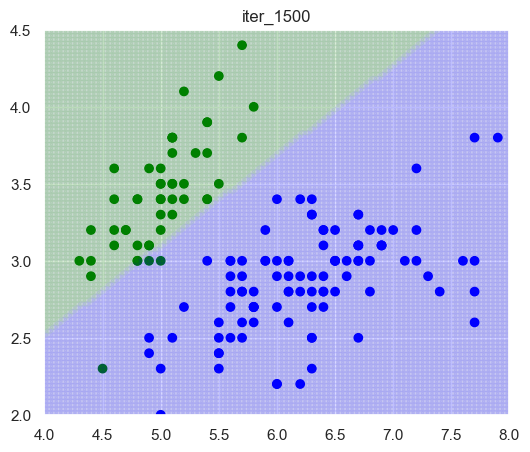

In [14]:
import os

import matplotlib
import seaborn as sns
sns.set_theme()

colors = ['green','blue']


def get_class_for_pts(x, y, beta):
    klass = []
    prod = beta[0] + beta[1] * x + beta[2] * y
    klass = np.array(prod >= 0).astype('uint8')
    return klass

yy, xx = np.meshgrid(
    np.linspace(4.0, 8.0, 100), 
    np.linspace(2.0, 4.5, 100), indexing='ij'
)

if not os.path.exists("lin_reg_progress"):
    os.makedirs("lin_reg_progress")


# for i in range(0, len(beta_all), 50):
iter_N = 1500
for i in range(iter_N, iter_N + 1):
    print(i)
    plt.figure(1, figsize=(6, 5))
    plt.cla()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, 
        cmap=matplotlib.colors.ListedColormap(colors)
    )
    klass = get_class_for_pts(yy.flatten(), xx.flatten(), beta_all[i])
    plt.scatter(yy, xx, c=klass, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.05)
    plt.xlim(4.0, 8.0)
    plt.ylim(2.0, 4.5)
    plt.title('iter_%d' % i)
#     plt.savefig("lin_reg_progress/iter_{:05d}.png".format(i))


In [15]:
# performance of self implemented logistic model

y_test_pred_2 = (logistic_model.predict(X_test) > 0.5).astype('uint8')
recall = recall_score(y_test, y_test_pred_2, average='binary')
specificity = recall_score(
    ~np.array(y_test, dtype='bool'), 
    ~np.array(y_test_pred_2, dtype='bool'), 
    average='binary'
)

print(f'accuracy: {accuracy_score(y_test, y_test_pred_2):0.3f}')
print(f'recall: {recall:0.3f}')
print(f'specificity: {specificity:0.3f}')

accuracy: 1.000
recall: 1.000
specificity: 1.000


In [ ]:
# skeleton => fill out live

class LogisticRegressionSkeleton:
    T = 1e5
    
    def get_prob(self, X, beta):                            
        pass

    def loss(self, X, beta, y):
        pass
    
    def gradient(self, X, beta, y):
        pass
    
    def gradient_descent_fit(self, X, beta, y):
        count = 0
        beta_ = np.copy(beta)
        while count < self.T:
            count += 1
            grad = self.gradient(X, beta_, y)
            beta_ -= LR * grad
            if np.sum(np.abs(grad)) < thresh:
                break
        return beta_

        
    def fit(self, X, y):
        self.beta = np.zeros((X.shape[1] + 1))
        self.beta += np.random.randn(X.shape[1] + 1)
        intercept_X = np.ones((X.shape[0], 1))
        self.X = np.concatenate((intercept_X, X), axis=1)
        self.y = y
        
        fitted_beta = self.grad_descent_fit(
            self.X, self.beta, self.y
        )
        self.beta = fitted_beta
        return self.beta
    
    def predict(self, X):
        pass


# Backpropagation 

### Explore:

- How many epochs necessary for perfect accuracy?
- What is the impact of learning rate alpha, when `epochs = 500`?
    - Try alpha: `.001, .01, .1, 1.0, 10.0`
- How to change this into batch update as opposed to just a single data point?

In [44]:
# import the necessary packages

class NeuralNetwork:
    """ Copied from: https://pyimagesearch.com/2021/05/06/backpropagation-from-scratch-with-python/
    theory - http://neuralnetworksanddeeplearning.com/chap2.html
    """
    def __init__(self, layers, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha

        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))

        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))

    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))

    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that x has already been passed through the 'sigmoid'
        # function
        return x * (1 - x)

    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))

    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]

        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])

            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)

            # once we have the net output, add it to our list of
            # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        error = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas 'D'; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]

        # once you understand the chain rule it becomes super easy
        # to implement with a 'for' loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]

        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes
            # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]

        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value 'p'
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation
            # function
            p = self.sigmoid(np.dot(p, self.W[layer]))

        # return the predicted value
        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)

        # return the loss
        return loss


In [53]:
nnet_model = NeuralNetwork(layers=[2, 2, 1], alpha=10)
nnet_model.fit(X_train, y_train, epochs=500)


[INFO] epoch=1, loss=1567.5887654
[INFO] epoch=100, loss=1568.0188945
[INFO] epoch=200, loss=1568.0108769
[INFO] epoch=300, loss=1568.0172312
[INFO] epoch=400, loss=1567.9865043
[INFO] epoch=500, loss=1567.9990129


In [54]:
# performance of NNet model

y_test_pred_3 = (nnet_model.predict(X_test) > 0.5).astype('uint8')
recall = recall_score(y_test, y_test_pred_3, average='binary')
specificity = recall_score(
    ~np.array(y_test, dtype='bool'), 
    ~np.array(y_test_pred_3, dtype='bool'), 
    average='binary'
)

print(f'accuracy: {accuracy_score(y_test, y_test_pred_3):0.3f}')
print(f'recall: {recall:0.3f}')
print(f'specificity: {specificity:0.3f}')

accuracy: 0.632
recall: 1.000
specificity: 0.125


In [37]:
# construct the XOR dataset

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=4000)

for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
        x, target[0], pred, step))

[INFO] epoch=1, loss=0.1386737
[INFO] epoch=100, loss=0.1245576
[INFO] epoch=200, loss=0.1238451
[INFO] epoch=300, loss=0.1221673
[INFO] epoch=400, loss=0.1172760
[INFO] epoch=500, loss=0.1039508
[INFO] epoch=600, loss=0.0836656
[INFO] epoch=700, loss=0.0585095
[INFO] epoch=800, loss=0.0326025
[INFO] epoch=900, loss=0.0191291
[INFO] epoch=1000, loss=0.0126395
[INFO] epoch=1100, loss=0.0091432
[INFO] epoch=1200, loss=0.0070445
[INFO] epoch=1300, loss=0.0056749
[INFO] epoch=1400, loss=0.0047228
[INFO] epoch=1500, loss=0.0040281
[INFO] epoch=1600, loss=0.0035018
[INFO] epoch=1700, loss=0.0030908
[INFO] epoch=1800, loss=0.0027619
[INFO] epoch=1900, loss=0.0024933
[INFO] epoch=2000, loss=0.0022702
[INFO] epoch=2100, loss=0.0020822
[INFO] epoch=2200, loss=0.0019217
[INFO] epoch=2300, loss=0.0017834
[INFO] epoch=2400, loss=0.0016629
[INFO] epoch=2500, loss=0.0015571
[INFO] epoch=2600, loss=0.0014635
[INFO] epoch=2700, loss=0.0013801
[INFO] epoch=2800, loss=0.0013054
[INFO] epoch=2900, loss=0.

In [55]:
# MNIST

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0],
    data.shape[1]))

(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)
# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))